In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys 
sys.path.append('..')
from collections import deque 
import copy
import itertools
import aoc_utils as au
import math 
from tqdm import tqdm
import matplotlib.pyplot as plt

In [48]:
input_text = au.read_txt_file_lines()
n_rows = len(input_text)
n_cols = len(input_text[0])
for ii in range(1, n_rows):
    assert len(input_text[ii]) == n_cols, f'row {ii} has {len(input_text[ii])} cols, not {n_cols}'
print(f'input has {n_rows} rows and {n_cols} cols')

input has 141 rows and 141 cols


139 1 1 139


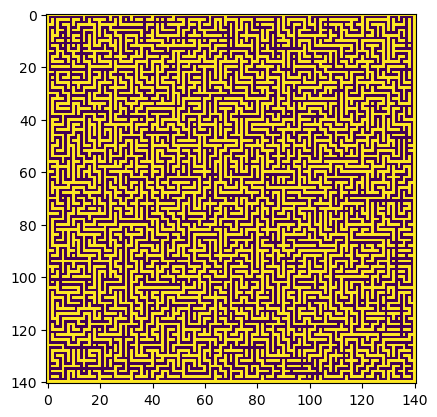

In [49]:
n = n_rows
maze = np.zeros((n, n), dtype=int)

for ir, r in enumerate(input_text):
    for ic, c in enumerate(r):
        if c == 'S':
            start_r, start_c = ir, ic
        elif c == 'E':
            end_r, end_c = ir, ic
        elif c == '#':
            maze[ir, ic] = 1

plt.imshow(maze, interpolation='none')

print(start_r, start_c, end_r, end_c)

In [50]:
dir_dict = {
    (1, 0): [(1, 0), (0, 1), (0, -1)],
    (-1, 0): [(0, 1), (-1, 0), (0, -1)],
    (0, 1): [(1, 0), (0, 1), (-1, 0)],
    (0, -1): [(1, 0), (-1, 0), (0, -1)]
}

dir_dict_diff = {
    (1, 0): [(0, 1), (0, -1)],
    (-1, 0): [(0, 1), (0, -1)],
    (0, 1): [(1, 0), (-1, 0)],
    (0, -1): [(1, 0), (-1, 0)]
}

dir_dict

{(1, 0): [(1, 0), (0, 1), (0, -1)],
 (-1, 0): [(0, 1), (-1, 0), (0, -1)],
 (0, 1): [(1, 0), (0, 1), (-1, 0)],
 (0, -1): [(1, 0), (-1, 0), (0, -1)]}

In [51]:
cost = {d: np.zeros((n_rows, n_cols)) + np.inf for d in dir_dict.keys()}  # keep track of lowest cost per dir
cost[(0, 1)][start_r, start_c] = 0
queue = deque([((start_r, start_c, (0, 1)))])
best_cost = np.inf 

def in_bounds(r, c):
    return (r >= 0) and (c >= 0) and (r < n_rows) and (c < n_cols) and (maze[r, c] == 0)

def check(rn, cn, dn, r, c, d, cost):
    if in_bounds(rn, cn): 
        if d == dn:
            tmp_cost = 1
        else:
            tmp_cost = 1001

        if cost[dn][rn, cn] > cost[d][r, c] + tmp_cost:  # if cheaper, update mat and return (so it can be added to queue)
            cost[dn][rn, cn] = cost[d][r, c] + tmp_cost
            return cost, (rn, cn, dn)
        
    return cost, None

while len(queue):
    r, c, d = queue.popleft()

    if r == end_r and c == end_c:
        if best_cost > cost[d][r, c]:  # new best
            best_cost = int(cost[d][r, c])
            print(best_cost)
        continue 

    for dn in dir_dict[d]:
        cost, update = check(rn=r + dn[0], cn=c + dn[1], dn=dn, r=r, c=c, d=d, cost=cost)
        if update is not None:
            queue.append(update)

    

87368
85396


## part 2

adjust to also save path

I'll just use the best cost from p1

To find multiple best paths, update checker to >= from >

In [52]:
cost = {d: np.zeros((n_rows, n_cols)) + np.inf for d in dir_dict.keys()}
cost[(0, 1)][start_r, start_c] = 0
queue = deque([((start_r, start_c, (0, 1), [(0, 0)]))])  # also include list of path taken
best_cost = np.inf 
list_best_paths = []
best_cost_part1 = 85396  ## make life easy

def in_bounds(r, c):
    return (r >= 0) and (c >= 0) and (r < n_rows) and (c < n_cols) and (maze[r, c] == 0)

def check(rn, cn, dn, r, c, d, cost):
    if in_bounds(rn, cn): 
        if d == dn:
            tmp_cost = 1
        else:
            tmp_cost = 1001

        if cost[dn][rn, cn] >= cost[d][r, c] + tmp_cost:  # updated >= to find multiple best paths
            cost[dn][rn, cn] = cost[d][r, c] + tmp_cost
            return cost, (rn, cn, dn)
        
    return cost, None

while len(queue):
    r, c, d, p = queue.popleft()

    if r == end_r and c == end_c:
        if cost[d][r, c] == best_cost_part1:
            list_best_paths.append(p) 
            continue 

    for dn in dir_dict[d]:
        cost, update = check(rn=r + dn[0], cn=c + dn[1], dn=dn, r=r, c=c, d=d, cost=cost)
        if update is not None:
            queue.append((update[0], update[1], update[2], p + [(update[0], update[1])]))
            

In [53]:
len(list_best_paths)

8

In [54]:
mat_best_tiles = np.zeros((n_rows, n_cols), dtype=int)

for p in list_best_paths:
    for (r, c) in p:
        mat_best_tiles[r, c] = 1

mat_best_tiles.sum()

428